In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
uber_data=pd.merge(ride_data,city_data,on="city")
# Display the data table for preview

uber_data.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

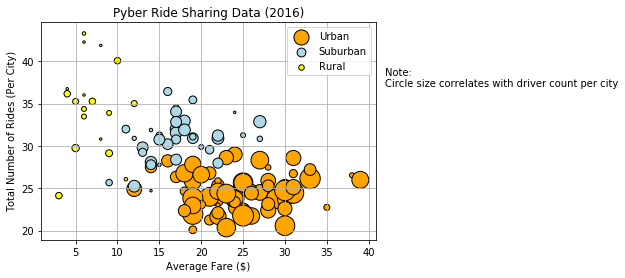

In [2]:
# Obtain the x and y coordinates for each of the three city types
city_group_by=uber_data.groupby("type")


x_axis=np.arange(0, 42, 1)

yr=uber_data[(uber_data.type=="Rural")]
ave_farer=yr.groupby('city').fare.mean()
x_rur=yr.groupby('city').fare.count()
dc_r=yr.groupby('city').driver_count.mean()


yu=uber_data[(uber_data.type=="Urban")]
ave_fareu=yu.groupby('city').fare.mean()
x_ruu=yu.groupby('city').fare.count()
dc_u=yu.groupby('city').driver_count.mean()

ys=uber_data[(uber_data.type=="Suburban")]
ave_fares=ys.groupby('city').fare.mean()
x_rus=ys.groupby('city').fare.count()
dc_s=ys.groupby('city').driver_count.mean()

# Build the scatter plots for each city types

plt.scatter(x_ruu, ave_fareu, marker="o", facecolors="orange", edgecolors="black", s=6*dc_u, alpha=1,label="Urban")
plt.scatter(x_rus, ave_fares, marker="o", facecolors="lightblue", edgecolors="black", s=6*dc_s, alpha=1,label="Suburban")
plt.scatter(x_rur, ave_farer, marker="o", facecolors="yellow", edgecolors="black", s=6*dc_r, alpha=1,label="Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid()

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(42, 37, "Note: \nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("Pyber Share Ride")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

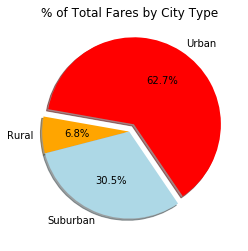

In [4]:
# Calculate Type Percents
pies = ["Rural", "Suburban", "Urban",]
pie_perc = city_group_by.fare.sum()
colors = ["orange","lightblue","red"]
explode = (0,0,0.1)

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(pie_perc, explode=explode, labels=pies, colors=colors,autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure
plt.savefig("PyPies City Type.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

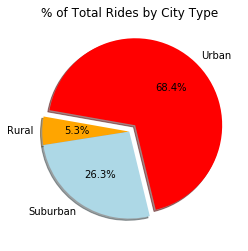

In [6]:
# Calculate Ride Percents
pies = ["Rural", "Suburban", "Urban",]
pie_perc = city_group_by.fare.count()
colors = ["orange","lightblue","red"]
explode = (0,0,0.1)
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(pie_perc, explode=explode, labels=pies, colors=colors,autopct="%1.1f%%", shadow=True, startangle=170)


# Save Figure
plt.savefig("PyPies Total Rides by City Type.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

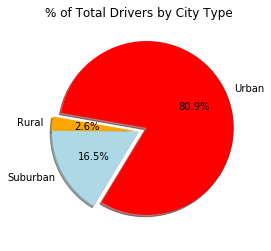

In [8]:
# Calculate Driver Percents
pies = ["Rural", "Suburban", "Urban",]
pie_perc = [dc_r.sum(),dc_s.sum(),dc_u.sum()]
colors = ["orange","lightblue","red"]
explode = (0,0,0.1)
# Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(pie_perc, explode=explode, labels=pies, colors=colors,autopct="%1.1f%%", shadow=True, startangle=170)


# Save Figure
plt.savefig("PyPies Total Drivers by City Type.png")

In [9]:
# Show Figure
plt.show()